In [1]:
import sys

In [2]:
from os import listdir
from os.path import isfile, join
from os import walk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from glob import glob
%matplotlib inline

In [6]:
from pathlib import Path

In [7]:
base = Path('/home/jovyan/AOI/data/')
data1_path = base / '20180703'
data1_label_path = data1_path / 'label'
data2_path = base / '20180705'
data2_label_path = data1_path / 'label'
data3_path = base / '20180726_S1'

In [82]:
len(folder_path)

3819

In [83]:
import xml.etree.ElementTree as ET
import pandas as pd
def read_files2df(files):
    df = pd.DataFrame()
    for f in files:
        record = read_xmlfile2dict(f)
        sr = pd.Series(record, name=f)
    
    df.append(sr)
    return df
    
def read_xmlfile2dict(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    print(xml_file, flush=True)
    record={
        'image_size_width': int(root.find('size').find('width').text),
        'image_size_height': int(root.find('size').find('height').text),
        'image_size_depth': int(root.find('size').find('depth').text),
        'op_defect_name': root.find('object').find('name').text,
        'pass_or_failed': root.find('folder').text,
        'pose': root.find('object').find('pose').text,
        'xmin': root.find('object').find('bndbox').find('xmin').text,
        'xmax': root.find('object').find('bndbox').find('xmax').text,
        'ymin': root.find('object').find('bndbox').find('ymin').text,
        'ymax': root.find('object').find('bndbox').find('xmax').text,
    }
    return record

In [84]:
df = read_files2df(folder_path)

/home/jovyan/AOI/data/20180726_S1/final/fail/C02_115_000167.xml
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_115_000168.xml
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_200_031750.xml
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_204_003678.xml
/home/jovyan/AOI/data/20180726_S1/final/fail/S07_200_031400.xml
/home/jovyan/AOI/data/20180726_S1/final/fail/S07_200_031746.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000169.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000171.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000375.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000377.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000554.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000556.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000570.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000572.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/C02_102_000573.xml
/home/jovyan/AOI/data/20180726_S1/final/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_021969.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_021970.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_021971.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_030013.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_031286.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_031294.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_204_031744.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_020997.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_020998.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021842.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021843.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021903.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021911.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021912.xml
/home/jovyan/AOI/data/20180726_S1/final/pass/S07_207_021978.xml
/home/jovyan/AOI/data/20180726_S1/final/

In [41]:

f = glob(str(data3_path / 'final' / 'fail' / '*.xml'))
print(f[0])
# d = xml2df(f[0])
# pd.read_html(f[0])
tree = ET.parse(f[0])
root = tree.getroot()
all_records = []


record = {}
for i, child in enumerate(root):
    for subchild in child:
        if subchild.tag is '':
            pass
        else:
            record[subchild.tag] = subchild.text
df = pd.DataFrame(record, index = [0])



/home/jovyan/AOI/data/20180726_S1/final/fail/C02_115_000167.xml


'1536'

In [46]:
for c in subchild:
    print(c)

<Element 'xmin' at 0x7f8f75a0fea8>
<Element 'ymin' at 0x7f8f75a0fef8>
<Element 'xmax' at 0x7f8f75a0ff48>
<Element 'ymax' at 0x7f8f75a0ff98>


In [42]:
df

,database,width,height,depth,name,pose,truncated,difficult,bndbox
0,Unknown,1536,2048,3,C08,Unspecified,0,0,\n\t\t\t


In [30]:
len(child)

0

In [11]:
tree

In [5]:
file_df = pd.DataFrame(columns=['dirpath', 'filenum'])
for (dirpath, dirnames, filenames) in walk(data1_path):
    sr = pd.Series({'dirpath': dirpath, 'filenum': len(filenames)}, name=dirpath)
    file_df = file_df.append(sr)
    
    # 
for (dirpath, dirnames, filenames) in walk(data2_path):
    sr = pd.Series({'dirpath': dirpath, 'filenum': len(filenames)}, name=dirpath)
    file_df = file_df.append(sr)
    
for (dirpath, dirnames, filenames) in walk(data3_path):
    sr = pd.Series({'dirpath': dirpath, 'filenum': len(filenames)}, name=dirpath)
    file_df = file_df.append(sr)
    
    

In [6]:
file_df['filenum']

/home/jovyan/AOI/data/20180703                                  1
/home/jovyan/AOI/data/20180703/label                            1
/home/jovyan/AOI/data/20180703/label/pass_check                 1
/home/jovyan/AOI/data/20180703/label/pass_check/t_001         873
/home/jovyan/AOI/data/20180703/label/pass                       1
/home/jovyan/AOI/data/20180703/label/pass/t_001               145
/home/jovyan/AOI/data/20180703/label/fail                       1
/home/jovyan/AOI/data/20180703/label/fail/t_001                 5
/home/jovyan/AOI/data/20180703/final                            1
/home/jovyan/AOI/data/20180703/final/pass                    2036
/home/jovyan/AOI/data/20180703/final/fail                      10
/home/jovyan/AOI/data/20180705                                  1
/home/jovyan/AOI/data/20180705/label                            1
/home/jovyan/AOI/data/20180705/label/pass_check                 1
/home/jovyan/AOI/data/20180705/label/pass_check/t_001         553
/home/jovy

# final.csv 

In [7]:
data1_path / 'final.csv'

PosixPath('/home/jovyan/AOI/data/20180703/final.csv')

In [8]:
data1_table = pd.read_csv(data1_path / 'final.csv')
data2_table = pd.read_csv(data2_path / 'final.csv')
data3_table = pd.read_csv(data3_path / 'final.csv')
data1_table['path'] = '20180703'
data2_table['path'] = '20180705'
data3_table['path'] = '20180726'
data_table = pd.concat([data1_table, data2_table, data3_table], axis=0, sort=False)



In [9]:
data_table['cModel'].nunique(), data_table['BoardSN'].nunique()

(9, 633)

# 每個Model有多少張圖

In [10]:
data_table.groupby('cModel')['BoardSN'].count()

cModel
S08AP2VFN018A-B     746
S08AP2VFN025A-B    2540
S08AP2VFN027A-T    2110
S0P084627021A-B    1615
S0P084651016A-B     200
S0P084651016A-T    1258
S0PEC4654004Z-T    1023
S0S084627002A-B      64
SP2ZZ6632003A-T     865
Name: BoardSN, dtype: int64

# 每個Model不同new_part_type有多少張圖

In [11]:
count_comp_model_df = data_table.groupby(['cModel', 'new_part_type'])[['Type']].count()
count_comp_model_df.rename({"Type":'Model-part count'}, axis=1,inplace=True)
count_comp_model_df.sort_values('Model-part count',ascending=False).head(10)

Model-part count
cModel          new_part_type                  
S0PEC4654004Z-T 115                         866
S0P084627021A-B 115                         842
S08AP2VFN025A-B 204                         662
                116                         567
                207                         489
S08AP2VFN027A-T 111                         416
S08AP2VFN025A-B 200                         400
S0P084651016A-T 115                         391
S08AP2VFN025A-B 115                         377
S08AP2VFN027A-T 102                         323

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


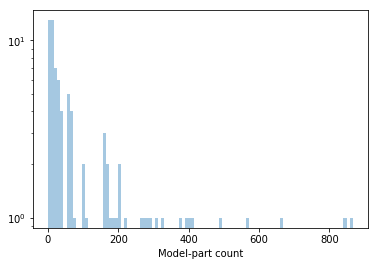

In [46]:
ax = sns.distplot(count_comp_model_df['Model-part count'], bins=100,kde=False,)
ax.set_yscale('log')


In [47]:
n=5
print(f"超過{n}張同一cModel,同一parte照片比例: {np.mean(count_comp_model_df['Model-part count'] > n)*100:02.2f}%")
count_comp_model_df.describe(percentiles=[0.5,0.6,0.7,0.8,0.9,0.95,0.99])

超過5張同一cModel,同一parte照片比例: 87.80%


,Model-part count
count,82.000000
mean,127.085366
std,183.572517
min,1.000000
50%,38.500000
60%,66.600000
70%,157.700000
80%,208.000000
90%,371.600000
95%,485.350000


## 有多少new_sub_part

In [ ]:
data_table

# defect type

In [24]:
print(f"unique AOI detected defect: {data_table['MachineDefect'].unique()}")


unique AOI detected defect: ['VOID FAIL' 'S02' 'C11' 'C02' 'C04' 'C03' 'ROTATE' 'S01' 'C13' 'LEAD_FAIL'
 'C08' 'MARKING' 'C09']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


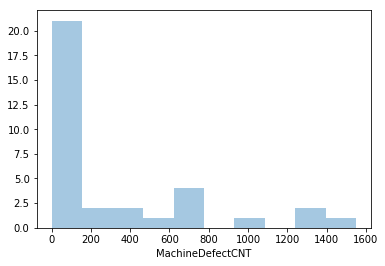

In [40]:
count_aoi_detect_df = data_table.groupby(['path', 'MachineDefect'])[['label']].count()
count_aoi_detect_df.rename_axis({'label':'MachineDefectCNT'},axis=1,inplace=True)
sns.distplot(count_aoi_detect_df['MachineDefectCNT'], kde=False,bins=10)

In [43]:
df = count_aoi_detect_df.reset_index()
df.pivot_table(values='MachineDefectCNT', index='MachineDefect',columns='path')


path,20180703,20180705,20180726
MachineDefect,,,
C02,42.0,1551.0,990.0
C03,484.0,1280.0,636.0
C04,25.0,130.0,30.0
C08,NaN,50.0,43.0
C09,NaN,NaN,435.0
C11,315.0,22.0,87.0
C13,1.0,11.0,NaN
LEAD_FAIL,2.0,246.0,28.0
MARKING,NaN,232.0,24.0


unique AOI detected defect: [nan 'C02' 'C01' 'C08' 'C03' 'S02' 'C14' 'S01']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


path,20180703,20180705,20180726
ConfirmDefect,,,
C01,1.0,NaN,NaN
C02,3.0,NaN,4.0
C03,NaN,1.0,NaN
C08,2.0,8.0,3.0
C14,NaN,1.0,NaN
S01,NaN,NaN,1.0
S02,NaN,2.0,2.0


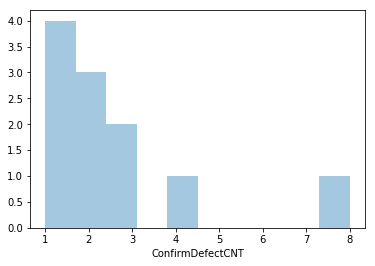

In [56]:
print(f"unique AOI detected defect: {data_table['ConfirmDefect'].unique()}")
count_confirmed_df = data_table.groupby(['path', 'ConfirmDefect'])[['index']].count()
count_confirmed_df.rename_axis({'index':'ConfirmDefectCNT'},axis=1,inplace=True)
sns.distplot(count_confirmed_df['ConfirmDefectCNT'], kde=False,bins=10)
df = count_confirmed_df.reset_index()
df.pivot_table(values='ConfirmDefectCNT', index='ConfirmDefect',columns='path')

## 在pass or fail資料夾要用label來看

In [58]:
data_table['index'] = np.arange(data_table.shape[0]) 
data_table.groupby(['path','label'])['index'].count()


path      label
20180703  0           5
          1        1018
20180705  0         551
          1        5028
20180726  0           7
          1        3812
Name: index, dtype: int64

# 怎麼樣用data_table 對應到圖檔

In [14]:
data_table['']

,cModel,BoardSN,CompName,Type,MachineDefect,ConfirmDefect,X1,Y1,X2,Y2,jpg_dir,jpg_name,newfile,newdefect,new_location,new_part_type,new_sub_part,label,path
0,S0PEC4654004Z-T,EC1826001696,C227_1,204300000024A,VOID FAIL,NaN,374,481,399,576,t_001,S07_204_000004.jpg,t_001/S07_204_000004.jpg,S07,C,204,NaN,1,20180703
1,S0PEC4654004Z-T,EC1826001696,U48_1,115500000050A,S02,NaN,862,1549,1068,2026,t_001,S02_115_000014.jpg,t_001/S02_115_000014.jpg,S02,U,115,NaN,1,20180703
2,S0PEC4654004Z-T,EC1826001696,U48_1,115500000050A,S02,NaN,464,1545,669,2024,t_001,S02_115_000015.jpg,t_001/S02_115_000015.jpg,S02,U,115,NaN,1,20180703
3,S0PEC4654004Z-T,EC1826001696,U48_1,115500000050A,S02,NaN,860,464,1065,537,t_001,S02_115_000018.jpg,t_001/S02_115_000018.jpg,S02,U,115,NaN,1,20180703
4,S0PEC4654004Z-T,EC1826001696,U48_1,115500000050A,S02,NaN,453,469,658,542,t_001,S02_115_000019.jpg,t_001/S02_115_000019.jpg,S02,U,115,NaN,1,20180703


In [21]:
data_table[['cModel', 'CompName', 'Type', 
            'new_part_type', 'new_sub_part',
            'jpg_dir','jpg_name','path']].sort_values(['path', 'cModel','jpg_name']).head(20)

,cModel,CompName,Type,new_part_type,new_sub_part,jpg_dir,jpg_name,path
150,S0PEC4654004Z-T,L6_1,102000000213A,102,NaN,t_001,C02_102_000316.jpg,20180703
243,S0PEC4654004Z-T,L6_1,102000000213A,102,NaN,t_001,C02_102_000494.jpg,20180703
332,S0PEC4654004Z-T,L2_1,102000000169A,102,NaN,t_001,C02_102_000663.jpg,20180703
769,S0PEC4654004Z-T,L31_1,102000000169A,102,NaN,t_001,C02_102_001523.jpg,20180703
85,S0PEC4654004Z-T,TO2_1,115000000048A,115,NaN,t_001,C02_115_000192.jpg,20180703
86,S0PEC4654004Z-T,TO2_1,115000000048A,115,NaN,t_001,C02_115_000193.jpg,20180703
771,S0PEC4654004Z-T,TO2_1,115000000048A,115,NaN,t_001,C02_115_001526.jpg,20180703
772,S0PEC4654004Z-T,TO2_1,115000000048A,115,NaN,t_001,C02_115_001527.jpg,20180703
1016,S0PEC4654004Z-T,D2_1,115000000101A,115,NaN,t_001,C02_115_001983.jpg,20180703
35,S0PEC4654004Z-T,CONN3_1,118200000097A,118,NaN,t_001,C02_118_000092.jpg,20180703
